## Latent Semantic Indexing Assignment (Extra credit)


When we apply SVD reduction to textual data it is called **Latent Semantic Indexing**.

This notebook asks you to work through an example in the domain of document retrieval.

Document set

$$
\begin {array}{ll}
d_0 &  \text{Romeo and Juliet.}\\
d_1 & \text{Juliet: O happy dagger!}\\
d_2 &  \text{Romeo died by dagger.}\\
d_3 & \text{"Live free or die", that’s  New-Hampshire’s motto.}\\
d_4 &  \text{Did you know, New-Hampshire is in New-England?}
\end{array}
$$


Query:  dies dagger

Goal.  Compute the following **relevance ranking** for the query:  d2, d1, d3, d0, d4

The key point:  d0 ranks higher than d4, even though both fail to have any query words.  Why?
Because d1 contains words that have **co-occurred** (occurred in the same document) with 
either or both query words.

The **term document** matrtix for the above data is:

$$
\begin {array}{lccccc}
& d_0 & d_1 & d_2 & d_3& d_4\\
\hline
\text{romeo} & 1&  0&  1&  0&  0\\
\text{juliet} & 1&  1&  0&  0&  0\\
\text{happy}  & 0&  1&  0&  0&  0\\
\text{dagger} & 0&  1&  1&  0&  0\\
\text{live} & 0&  0&  0&  1&  0\\
\text{die} & 0&  0&  1&  1&  0\\
\text{free} & 0&  0&  0&  1&  0\\
\text{new-hampshire} & 0&  0&  0&  1&  1
\end{array}
$$

In [302]:
docs = ("Romeo and Juliet.",
        "Juliet: O happy dagger!", 
        "Romeo died by dagger.",
        "' Live free or die ', that's New-Hampshire's motto.",
        "Did you know, New-Hampshire is in New-England?")

In [303]:
import numpy as np

#toy term document matrix
TD = np.array([
    [1,0,1,0,0],
    [1,1,0,0,0],
    [0,1,0,0,0],
    [0,1,1,0,0],
    [0,0,0,1,0],
    [0,0,1,1,0],
    [0,0,0,1,0],
    [0,0,0,1,1],
])

#toy vocabulary (for the doc set above)
V = "romeo julie happy dagger live die free new-hampshire".split()

1.  Preprocess this data correctly so as to arrive at the **target Term Document Matrix** and vocabulary (above), 
    using scikit learn text preprocessing tools (`Vectorizer`).
2.  Reduce to 2 dimensions using SVD.
3.  Transform the query into the reduced space.
4.  Measure document relevance to the query using cosine.
5.  Produce the target relevance ranking for the document set.

In [304]:
from sklearn.feature_extraction.text import CountVectorizer
#from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity
import nltk
from nltk.tokenize import TreebankWordTokenizer#RegexpTokenizer#StringTokenizer
stemmer = nltk.PorterStemmer()
#stemmer = nltk.LancasterStemmer()
tb_tknzr = TreebankWordTokenizer()

# Slip a stemmer into the tokenizer

def my_tokenizer (doc,stemmer=stemmer,tokenizer=tb_tknzr):
    return [stemmer.stem(wd) for wd in tokenizer.tokenize(doc)]

puncts = list(":,.?!\'")
stop_words= "and by did in is or know you that \'s o".split()
cv = CountVectorizer(stop_words=stop_words+puncts,tokenizer=my_tokenizer,min_df=2,token_pattern=None)
# we call it dtm because the rows are docs, and the columns are terms (words)
dtm = cv.fit_transform(docs)

#to get vocab list
#cv.get_feature_names_out()

#cv.inverse_transform(dtm)

In [305]:
# Porter
stmr = nltk.PorterStemmer()
my_tokenizer("u s forces hope that the world dominates by domination aggravation and fidelity",
            stemmer=stmr)

['u',
 's',
 'forc',
 'hope',
 'that',
 'the',
 'world',
 'domin',
 'by',
 'domin',
 'aggrav',
 'and',
 'fidel']

In [306]:
# Lancaster
stmr = nltk.LancasterStemmer()
my_tokenizer("u s forces hope that the world dominates by domination aggravation and fidelity",
            stemmer=stmr)

['u',
 's',
 'forc',
 'hop',
 'that',
 'the',
 'world',
 'domin',
 'by',
 'domin',
 'aggrav',
 'and',
 'fidel']

In [224]:
cv.get_feature_names_out()

array(['dagger', 'die', 'juliet', 'new-hampshir', 'romeo'], dtype=object)

#### Reducing

In [225]:
reducer = TruncatedSVD(n_components=2)
dtm2 = reducer.fit_transform(dtm)

In [226]:
dtm2

array([[ 0.94377067, -0.62279212],
       [ 0.94377067, -0.62279212],
       [ 1.54890367,  0.17205123],
       [ 0.6544984 ,  1.19805373],
       [ 0.17974866,  0.69503072]])

In [227]:
reducer.components_

array([[ 0.53707696,  0.47474974,  0.40669371,  0.17974866,  0.53707696],
       [-0.16548589,  0.50302301, -0.45730623,  0.69503072, -0.16548589]])

In [228]:
q0 = cv.transform(np.array(["died dagger"]))
q1 = reducer.transform(q0)

In [229]:
dtm2

array([[ 0.94377067, -0.62279212],
       [ 0.94377067, -0.62279212],
       [ 1.54890367,  0.17205123],
       [ 0.6544984 ,  1.19805373],
       [ 0.17974866,  0.69503072]])

We wanted d2, d1, d3, d0, d4  (most to least)

We got:

In [234]:
sims = cosine_similarity(q1,dtm2)
sims.argsort()[0,:][::-1] #least to most: key 0 > 4

array([2, 3, 1, 0, 4])

In [113]:
data

('Romeo and Juliet.',
 'Juliet: O happy dagger!',
 'Romeo died by dagger.',
 "' Live free or die ', that's New-Hampshire's motto.",
 'Did you know, New-Hampshire is in New-England?')

In [200]:
dtm

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 10 stored elements and shape (5, 5)>

In [203]:
tdm.shape,red2.shape

((5, 5), (5, 2))

In [204]:
from numpy.linalg import eig
tdm = (dtm.toarray()).T
GM = tdm.T@tdm
# cols of evecs are the evecs
evals,evecs = eig(GM)
# confirms the last two are the biggest 
idxs = evals.argsort()
(e0,e1) = evecs[:,-1],evecs[:,-2]
red2 = evecs[:,-2:]
(lambda0,lambda1) = evals[-1],evals[-2]
#transform docs to 2D 
tdm2 = dtm@red2
tdm2

array([[-1.17707674e-16,  1.03209670e+00],
       [-7.07106781e-01,  1.80924163e-01],
       [ 2.44249065e-15,  5.45507975e-01],
       [ 7.07106781e-01, -6.83117689e-01],
       [ 1.55128670e-16, -5.81229502e-01]])

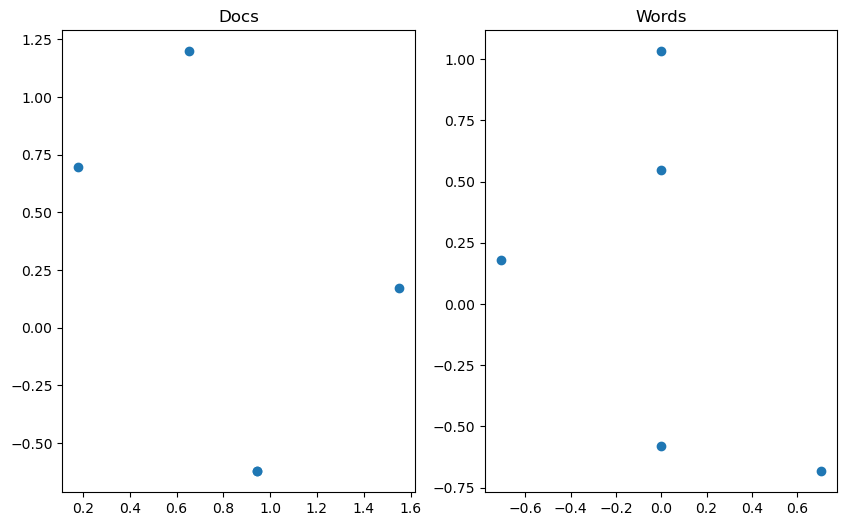

In [207]:
from matplotlib import pyplot as plt

(fig,(ax0,ax1)) = plt.subplots(1,2, figsize= (10,6))

ax0.set_title("Docs")
ax0.scatter(dtm2[:,0],dtm2[:,1])
ax1.set_title("Words")
ax1.scatter(tdm2[:,0],tdm2[:,1])

## State of the Union Task

1. Do a TruncatedSVD reduction of the State of the Union data set, which consists of all the state of the union addresses of U.S. presidents since the practice began (1945?  Harry S. Truman).  Construct a reducer designed to reduce the term document matrix to to 200 dimensions.  What number of dimensions does the model actually reduce to for our data?  Why?
2. Find the document ranking for the two-word query "evil empire".
3. Compute the set of documents that contain neither of the two query words.  Find the highest ranking document within that set. 
4. Compare docs 30 and 22.  Does their ranking reflect their relevance?
5. What is the minimum value that the scikit learn implementation of cosine can take?  What is the minimum value of the cosine simlarity scores in our data?  If they differ by more than 1e-8, is that a property of our data or the SVD computation or the scikit learn implementation of cosine?  Why?  If you have no idea why, make an educated guess and explain what lie sbehin your guess.

In [313]:
from nltk.corpus import state_union
from sklearn.feature_extraction.text import TfidfVectorizer

In [312]:
fid0 =state_union.fileids()[0]
docs = []
for fid in state_union.fileids():
    with state_union.open(fid) as fh:
        docs.append(fh.read())

In [334]:
from nltk.corpus import stopwords
import nltk
from nltk.tokenize import TreebankWordTokenizer
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Slip a stemmer into the tokenizer

def my_tokenizer (doc,stemmer=stemmer,tknzr=tb_tknzr):
    return [stemmer.stem(wd) for wd in tknzr.tokenize(doc)]


stemmer = nltk.PorterStemmer()
#stops = list(stopwords.words("english"))#
stops = [stemmer.stem(st) for st in stopwords.words("english")]
tb_tknzr = TreebankWordTokenizer()
puncts = list(":,.?!\'")
cv = TfidfVectorizer(stop_words=stops+puncts,tokenizer=my_tokenizer,min_df=2,token_pattern=None)

Added by student (system)

In [335]:
dtm = cv.fit_transform(docs)
reducer = TruncatedSVD(n_components=200)
dtm2 = reducer.fit_transform(dtm)
dtm2.shape

(65, 65)

Added by student query

In [336]:
query = ["evil empire"]
wd0,wd1 = query[0].split()
q0 = cv.transform(np.array(query))
#2D array with same num cols as term-doc matrix
#i.e., a 1 doc term-doc matrix
print(q0.shape)
q1 = reducer.transform(q0)

(1, 6711)


Added by student: doc relevance (similarity computation)

In [337]:
sims = cosine_similarity(q1,dtm2)[0]
rankings = sims.argsort() #least to most:
print(f"Least: {sims[rankings[0]]:.3f} Most: {sims[rankings[-1]]:.3f}")
rankings

Least: -0.000 Most: 0.353


array([16,  9,  8, 42, 14, 11, 10, 13, 19, 26, 58, 15, 56, 33, 55, 24, 25,
       37, 45, 46,  7, 44, 30, 34, 57, 43, 53,  0, 40, 54, 50, 41, 22, 31,
       12, 49, 27,  2, 39,  1, 62, 64, 52, 51, 32,  3, 47,  6, 28, 48, 63,
       23, 38, 59, 60,  5, 20, 36, 29, 35, 61, 18,  4, 17, 21])

Arange from highest to lowest: `tr_rankings[0]`has the best sim score:

In [359]:
tr_rankings = rankings[::-1]

array([21, 17,  4, 18, 61, 35, 29, 36, 20,  5, 60, 59, 38, 23, 63, 48, 28,
        6, 47,  3, 32, 51, 52, 64, 62,  1, 39,  2, 27, 49, 12, 31, 22, 41,
       50, 54, 40,  0, 53, 43, 57, 34, 30, 44,  7, 46, 45, 37, 25, 24, 55,
       33, 56, 15, 58, 26, 19, 13, 10, 11, 14, 42,  8,  9, 16])

There are a number of negative cosine values but they are **all** effectively 0:

In [360]:
print(len([sims[rankings[i]] for i in range(len(rankings)) if sims[rankings[i]] <= 0]))
sims.min()

26


np.float64(-1.0047174355276416e-15)

In [361]:
rankings.shape

(65,)

Well over half of our 65 similarity scores are effectively zero:

In [362]:
(np.abs(sims) < 1e-8).sum()

np.int64(39)

In [363]:
sim_vec = sims
# most sim to least
hdr="Rank   Doc   Sim"
print(hdr)
print((len(hdr)+2)*"=")
for i in range(20,31):
    print(f" {i:>2}    {tr_rankings[i]:>2}   {sim_vec[tr_rankings[i]]: >5.3e}")

Rank   Doc   Sim
 20    32   7.844e-02
 21    51   5.230e-02
 22    52   4.407e-02
 23    64   3.761e-02
 24    62   3.636e-02
 25     1   1.389e-02
 26    39   2.079e-15
 27     2   1.973e-15
 28    27   6.331e-16
 29    49   5.433e-16
 30    12   5.129e-16


Docs containing neither query word

In [356]:
S3 = {i for i in range(len(docs)) if wd0 not in docs[i] and wd1 not in docs[i] }
S3

{0,
 2,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 19,
 24,
 25,
 26,
 27,
 30,
 31,
 33,
 34,
 37,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 49,
 50,
 53,
 54,
 55,
 56,
 57,
 58}

The sim scores of our non-query word docs are low, but they are far from the lowest

In [357]:
sims[list(S3)]

array([ 4.77225661e-17,  1.97251941e-15, -2.08984856e-16, -8.94027746e-16,
       -9.11763303e-16, -5.44216384e-16, -5.58497275e-16,  5.12949663e-16,
       -5.33744658e-16, -6.08074994e-16, -3.83976153e-16, -1.00471744e-15,
       -5.08418063e-16, -3.33795172e-16, -2.69364905e-16, -3.88982182e-16,
        6.33073944e-16, -5.54889137e-17,  4.05436535e-16, -3.76352941e-16,
       -5.11185895e-17, -2.52963035e-16,  2.07894260e-15,  4.90205856e-17,
        2.85733771e-16, -7.83738845e-16, -1.33850851e-17, -1.96759983e-16,
       -2.39369694e-16, -2.14878965e-16,  5.43332739e-16,  1.91282002e-16,
        8.91323148e-18,  8.28638887e-17, -3.58364141e-16, -3.82048942e-16,
       -3.53136927e-17, -3.85822322e-16])

In [358]:
## Ranks of the non query word docs.  The highest is 27.
[np.where(rankings ==idx)[0][0] for idx in S3]

[np.int64(27),
 np.int64(37),
 np.int64(20),
 np.int64(2),
 np.int64(1),
 np.int64(6),
 np.int64(5),
 np.int64(34),
 np.int64(7),
 np.int64(4),
 np.int64(11),
 np.int64(0),
 np.int64(8),
 np.int64(15),
 np.int64(16),
 np.int64(9),
 np.int64(36),
 np.int64(22),
 np.int64(33),
 np.int64(13),
 np.int64(23),
 np.int64(17),
 np.int64(38),
 np.int64(28),
 np.int64(31),
 np.int64(3),
 np.int64(25),
 np.int64(21),
 np.int64(18),
 np.int64(19),
 np.int64(35),
 np.int64(30),
 np.int64(26),
 np.int64(29),
 np.int64(14),
 np.int64(12),
 np.int64(24),
 np.int64(10)]

In [342]:
rankings

array([16,  9,  8, 42, 14, 11, 10, 13, 19, 26, 58, 15, 56, 33, 55, 24, 25,
       37, 45, 46,  7, 44, 30, 34, 57, 43, 53,  0, 40, 54, 50, 41, 22, 31,
       12, 49, 27,  2, 39,  1, 62, 64, 52, 51, 32,  3, 47,  6, 28, 48, 63,
       23, 38, 59, 60,  5, 20, 36, 29, 35, 61, 18,  4, 17, 21])

In [311]:
[docs[i][-20:] for i in range(len(docs))]

['Romeo and Juliet.',
 'iet: O happy dagger!',
 'omeo died by dagger.',
 "w-Hampshire's motto.",
 'e is in New-England?']

In [197]:
print(docs[28])

Address on the State of the Union Delivered Before a Joint Session of the Congress. January 20, 1972

Mr. Speaker, Mr. President, my colleagues in the Congress, our distinguished guests, my fellow Americans:
Ą@Twenty-five years ago I sat here as a freshman CongressmanĄXalong with Speaker AlbertĄXand listened for the first time to the President address the State of the Union.
  I shall never forget that moment. The Senate, the diplomatic corps, the Supreme Court, the Cabinet entered the Chamber, and then the President of the United States. As all of you are aware, I had some differences with President Truman. He had some with me. But I remember that on that dayĄXthe day he addressed that joint session of the newly elected Republican 80th Congress, he spoke not as a partisan, but as President of all the peopleĄXcalling upon the Congress to put aside partisan considerations in the national interest.
  The Greek-Turkish aid program, the Marshall Plan, the great foreign policy initiatives w

In [255]:

hit22=False
for (i,d_idx) in enumerate(rankings[0][::-1]):
    if (wd0 not in docs[d_idx]) and (wd1 not in docs[d_idx]):
        hit22=True
        print(i,d_idx)
    else:
        print(i, d_idx,wd0 in docs[d_idx],wd1 in docs[d_idx])
        #break

#if hit22:
#    print(docs[d_idx])

0 21 False True
1 17 True False
2 4 True False
3 18 False True
4 61 True False
5 35 False True
6 29 True False
7 36 False True
8 20 False True
9 60 True False
10 5 True True
11 59 True False
12 38 False True
13 63 True True
14 23 True False
15 48 True False
16 28 True False
17 6 True True
18 47 True False
19 32 True False
20 3 True False
21 51 True False
22 52 True False
23 64 True True
24 62 True True
25 1 True False
26 30
27 26
28 43
29 57
30 24
31 40
32 16
33 8
34 15
35 13
36 56
37 12
38 10
39 54
40 22 False True
41 53
42 58
43 11
44 14
45 2
46 9
47 50
48 42
49 31
50 55
51 45
52 27
53 46
54 19
55 41
56 25
57 0
58 49
59 44
60 33
61 37
62 34
63 7
64 39


In [130]:
"leaders" in docs[0]

True

In [150]:
"bozo" in docs[19]

False

In [151]:
set(docs[0].split()).intersection(set(docs[1].split()).intersection())

{'-',
 '16,',
 '1945',
 'A',
 'All',
 'America',
 'American',
 'Americans',
 'As',
 'At',
 'Because',
 'But',
 'CONGRESS',
 'Conference',
 'Congress',
 'Congress,',
 'During',
 'Even',
 'Every',
 'For',
 'Francisco',
 'General',
 'Germany',
 'HARRY',
 'He',
 'However,',
 'I',
 'If',
 'In',
 'It',
 'Japan',
 'King,',
 'May',
 'Nations',
 'No',
 'OF',
 'On',
 'Only',
 'Organization.',
 'Our',
 'PRESIDENT',
 'Roosevelt',
 'S.',
 'San',
 'So',
 'States.',
 'Such',
 'THE',
 "TRUMAN'S",
 'That',
 'The',
 'They',
 'This',
 'To',
 'United',
 'We',
 'When',
 'While',
 'With',
 'Within',
 'a',
 'able',
 'achieve',
 'achieved',
 'after',
 'again',
 'against',
 'ahead',
 'ahead,',
 'all',
 'all,',
 'along',
 'already',
 'also',
 'always',
 'am',
 'an',
 'and',
 'announced',
 'another',
 'any',
 'are',
 'armed',
 'as',
 'assigned',
 'assist',
 'assumed',
 'assure',
 'at',
 'back',
 'based',
 'be',
 'be.',
 'become',
 'becomes',
 'been',
 'before',
 'being',
 'believe',
 'benefit',
 'better',
 'betw